**GOOGLE SMARTBRIDGE EXTERNSHIP 2023**\
**ASSIGNMENT - 4 WINE QUALITY PREDICTION**\
**NINAD NILESH SUGANDHI**

**Problem Statement**\
Project Title:\
Grapes to Greatness: Machine Learning in Wine Quality Prediction\
Description:\
Predicting wine quality using machine learning is a common and valuable application in the field of data science and analytics. Wine quality prediction involves building a model that can 
assess and predict the quality of a wine based on various input features, such as chemical composition, sensory characteristics, and environmental factors.\
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic 
issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).\
Dataset: <a href = "https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009">link</a>\
Task:\
• Load the Dataset\
• Data preprocessing including visualization\
• Machine Learning Model building\
• Evaluate the model\
• Test with random observation

1. [Importing Libraries](#importing_libraries)
2. [Loading Data](#loading_data)
3. [Data understanding and preprocessing](#data_preprocessing)
4. [Data Visualization](#eda) 📊\
    4.1. [Univariate Analysis](#univariate)\
    4.2. [Bi- Variate Analysis](#bivariate)\
    4.3. [Multi-Variate Analysis](#multivariate)
5. [Model building](#modeling)
6. [Model Evaluation and Testing based on random values](#evaluate)
7. [Conclusion](#conclusion)

<a id="importing_libraries"></a>
**1. Importing Libraries**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import itertools
import math
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, f1_score, precision_score
from wordcloud import WordCloud

<a id="loading_data"></a>
**2. Loading Data**

In [2]:
data = pd.read_csv("D:\\NINAD SUGANDHI\\SMARTBRIDGE\\winequality-red.csv")
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

<a id="data_preprocessing"></a>
**3. Data understanding and preprocessing**

In [3]:
data.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [4]:
data.tail(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1589            6.6             0.725         0.20             7.8      0.073   
1590            6.3             0.550         0.15             1.8      0.077   
1591            5.4             0.740         0.09             1.7      0.089   
1592            6.3             0.510         0.13             2.3      0.076   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1589                 29.0                  79.0  0.99770  3.29       0.54   
1590                 26.0                  35.0  0.99314  3.32       0.82   
1591                 16.0                  26.0  0.99402  3.67       0.56   
1592                 29.0                  40.0  0.99574  3.42       0.75   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1589      9.2        5  
1590     11.6        6  
1591     11.6        6  
1592     11.0        6  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [5]:
data.isnull()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1594          False             False        False           False      False   
1595          False             False        False           False      False   
1596          False             False        False           False      False   
1597          False             False        False           False      False   
1598          False             False        False           False      False   

      free sulfur dioxide  total sulfur dioxide  density     pH  sulphates  \
0                   False                 False    False  False      False   
1                   False                 False    False  False      False   
2                   False                 False    False  False      False   
3                   False                 False    False  False      False   
4                   False                 False    False  False      False   
...                   ...                   ...      ...    ...        ...   
1594                False                 False    False  False      False   
1595                False                 False    False  False      False   
1596                False                 False    False  False      False   
1597                False                 False    False  False      False   
1598                False                 False    False  False      False   

      alcohol  quality  
0       False    False  
1       False    False  
2       False    False  
3       False    False  
4       False    False  
...       ...      ...  
1594    False    False  
1595    False    False  
1596    False    False  
1597    False    False  
1598    False    False  

[1599 rows x 12 columns]

In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
data.shape

(1599, 12)

In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
data.size

19188

In [10]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [11]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
data.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [13]:
data.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [14]:
data.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.0

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [16]:
description = data.describe().T.style.background_gradient(
    cmap='viridis',  # colormap
    low=0, high=1,   # range of colors for the gradient
    axis=None        # gradient across the entire dataFrame
)

# styling attributes
styled_description = description.set_properties(**{'font-size': '10pt', 'text-align': 'center'}).bar(subset=['mean'], color='#FFA07A')

styled_description

In [17]:
data.empty

False

In [18]:
data.index

RangeIndex(start=0, stop=1599, step=1)

In [19]:
data.max()

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
quality                   8.00000
dtype: float64

In [20]:
data.min()

fixed acidity           4.60000
volatile acidity        0.12000
citric acid             0.00000
residual sugar          0.90000
chlorides               0.01200
free sulfur dioxide     1.00000
total sulfur dioxide    6.00000
density                 0.99007
pH                      2.74000
sulphates               0.33000
alcohol                 8.40000
quality                 3.00000
dtype: float64

In [21]:
data.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [22]:
data.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

In [23]:
data.mode()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.2               0.6          0.0             2.0       0.08   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                  6.0                  28.0   0.9972  3.3        0.6   

   alcohol  quality  
0      9.5        5

In [24]:
data.shape

(1599, 12)

In [25]:
data.values

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [26]:
data.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality
7.5            0.510             0.02         1.7             0.084      13.0                 31.0                  0.99538  3.36  0.54       10.5     6          4
6.7            0.460             0.24         1.7             0.077      18.0                 34.0                  0.99480  3.39  0.60       10.6     6          4
7.2            0.360             0.46         2.1             0.074      24.0                 44.0                  0.99534  3.40  0.85       11.0     7          4
               0.695             0.13         2.0             0.076      12.0                 20.0                  0.99546  3.29  0.54       10.1     5          4
8.3            0.650             0.10         2.9             0.089      17.0                 40.0                  0.99803  3.29  0.55       9.5      5          3
                     

In [27]:
correlation = data.corr()
print("Correlation: \n", correlation)

Correlation: 
                       fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fi

In [28]:
covariance = data.cov()
print("Covariance: \n", covariance)

Covariance: 
                       fixed acidity  volatile acidity  citric acid  \
fixed acidity              3.031416         -0.079851     0.227820   
volatile acidity          -0.079851          0.032062    -0.019272   
citric acid                0.227820         -0.019272     0.037947   
residual sugar             0.281756          0.000484     0.039434   
chlorides                  0.007679          0.000517     0.001869   
free sulfur dioxide       -2.800921         -0.019674    -0.124252   
total sulfur dioxide      -6.482346          0.450426     0.227697   
density                    0.002195          0.000007     0.000134   
pH                        -0.183586          0.006495    -0.016298   
sulphates                  0.054010         -0.007921     0.010328   
alcohol                   -0.114421         -0.038600     0.022815   
quality                    0.174424         -0.056476     0.035612   

                      residual sugar  chlorides  free sulfur dioxide  \
fix

In [29]:
def rename_columns(columns):
    return columns.lower().replace(' ','_')

data.rename(columns = rename_columns, inplace = True)

In [30]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<a id="eda"></a>
**4. Data Visualization**

<a id="univariate"></a>
**4.1. Univariate Visualizations**

<Axes: >

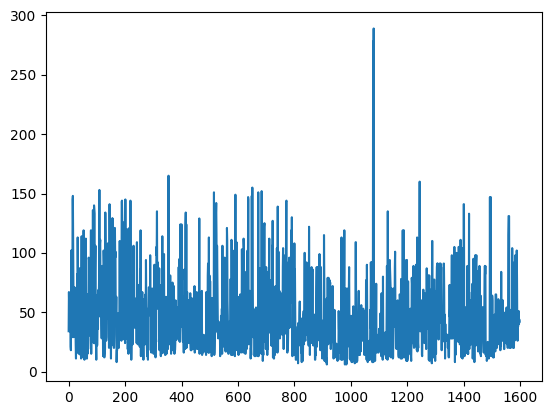

In [31]:
data.total_sulfur_dioxide.plot()

<Axes: >

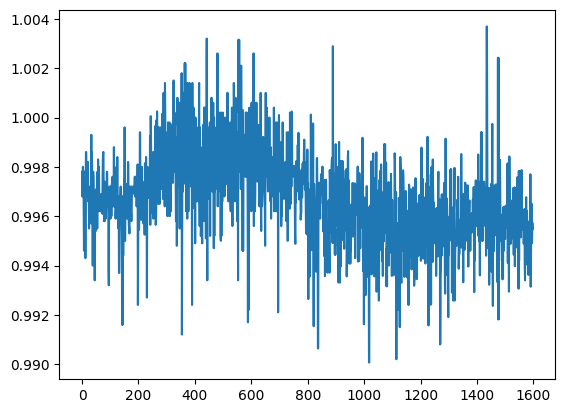

In [32]:
data.density.plot()

<Axes: xlabel='quality', ylabel='Density'>

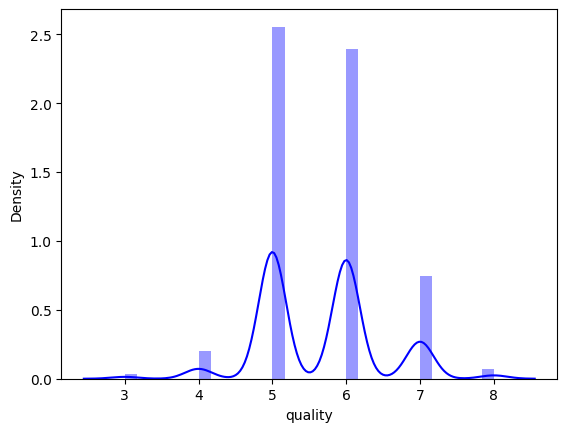

In [33]:
sns.distplot(data.quality, color = "blue")

<Axes: xlabel='alcohol', ylabel='Density'>

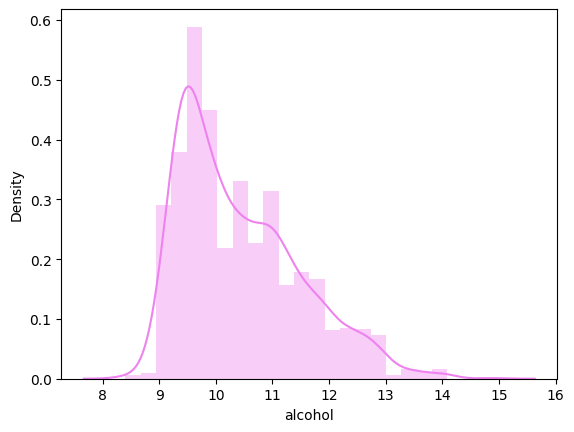

In [34]:
sns.distplot(data.alcohol, color="violet")

<Axes: xlabel='ph', ylabel='Density'>

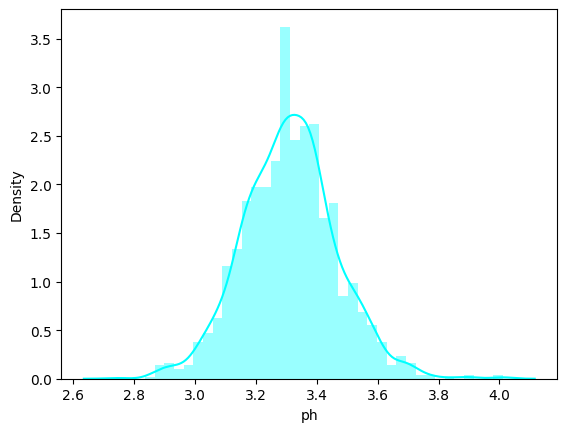

In [35]:
sns.distplot(data.ph, color="cyan")

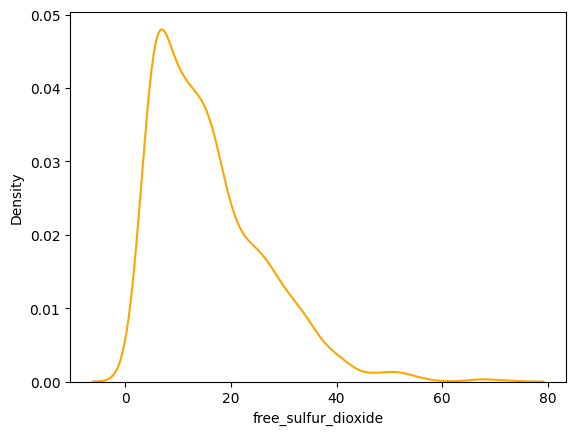

In [36]:
sns.kdeplot(data=data, x="free_sulfur_dioxide", color="orange")
plt.show()

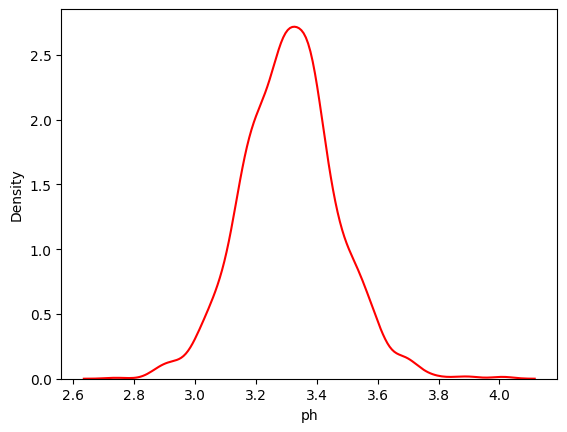

In [37]:
sns.kdeplot(data=data, x="ph", color="red")
plt.show()

<Axes: xlabel='chlorides', ylabel='Count'>

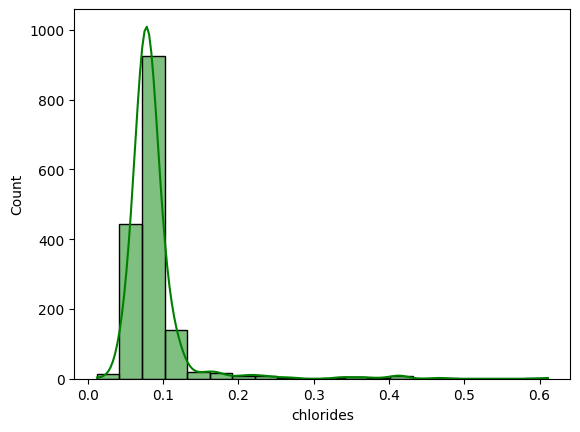

In [38]:
sns.histplot(data=data, x='chlorides', bins=20, kde=True, color="green")

<Axes: xlabel='residual_sugar', ylabel='Count'>

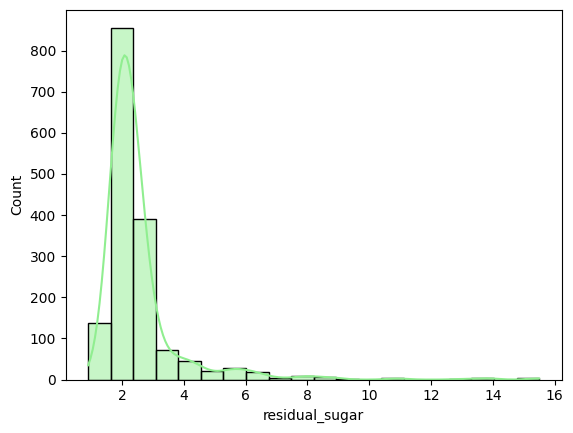

In [39]:
sns.histplot(data=data, x='residual_sugar', bins=20, kde=True, color="lightgreen")

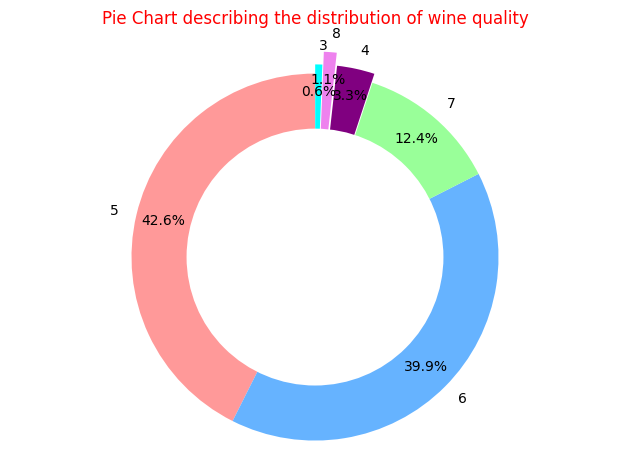

In [40]:
colors = ['#ff9999','#66b3ff','#99ff99', 'purple', 'violet', 'cyan']
explode = (0,0,0, 0.05, 0.12, 0.05)

fig1, ax1 = plt.subplots()

species_counts = data['quality'].value_counts()

plt.pie(species_counts, colors = colors, labels=species_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.title("Pie Chart describing the distribution of wine quality", color = "red")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

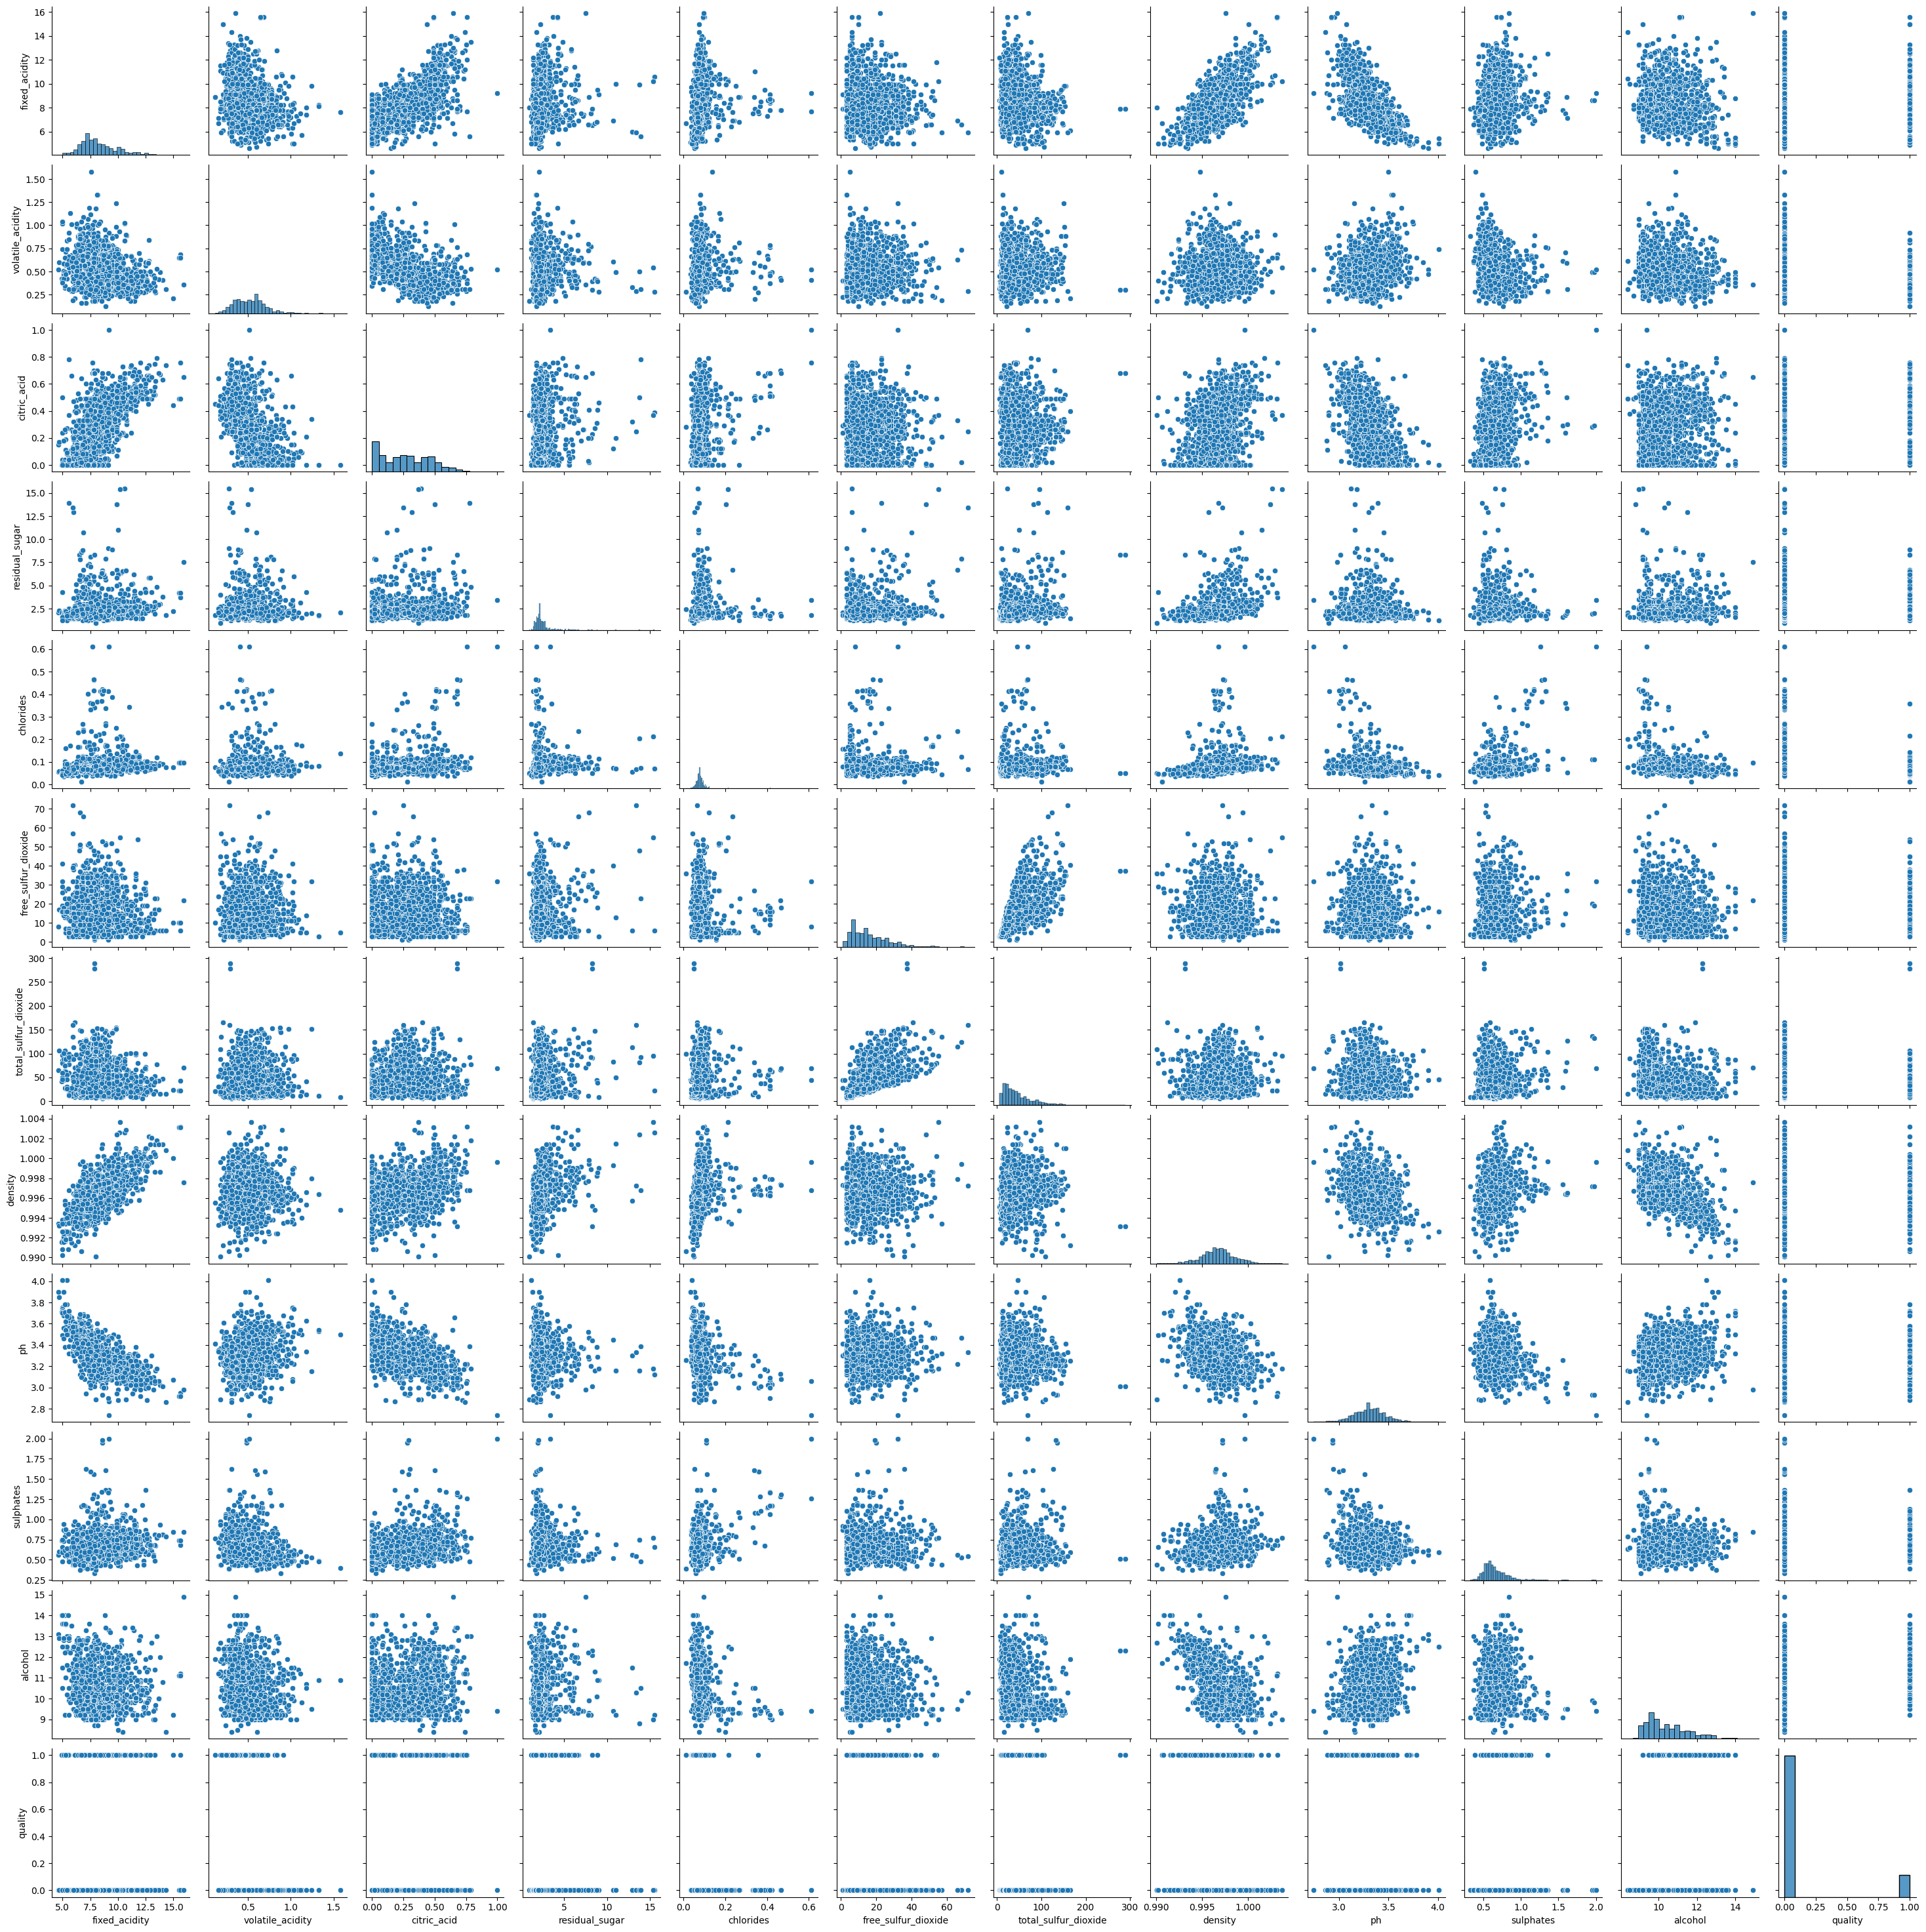

In [96]:
sns.pairplot(data)

<a id="bivariate"></a>
**4.2. Bivariate Analysis**

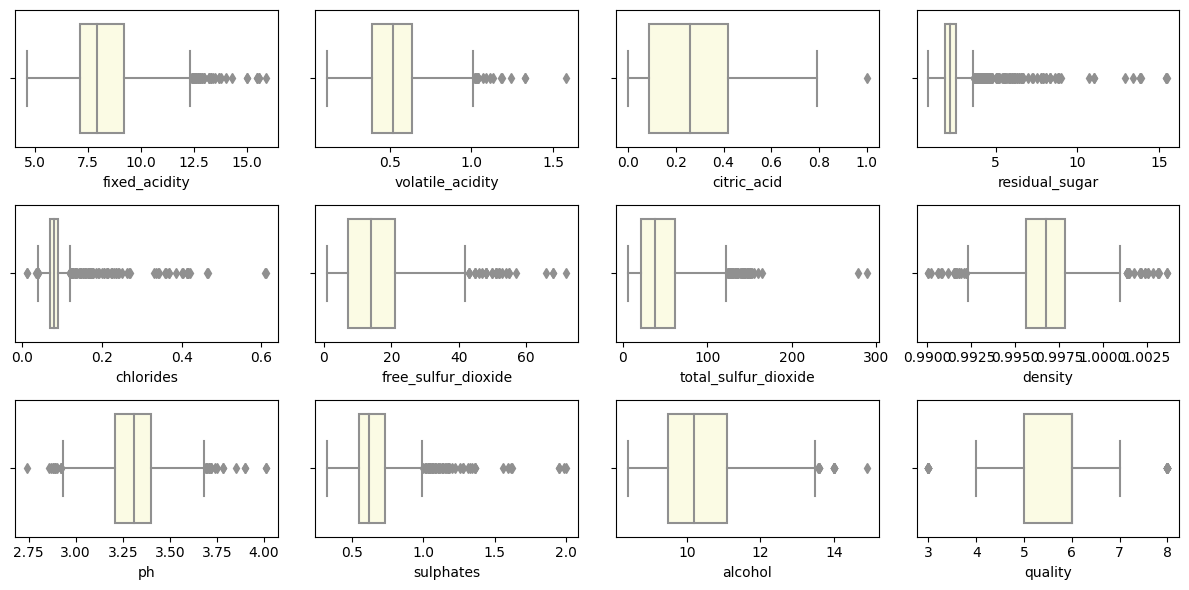

In [43]:
columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol', 'quality']

plt.figure(figsize=(12, 6))

for i, column in enumerate(columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=data, x=column, orient='vertical', color='lightyellow')

plt.tight_layout()

plt.show()

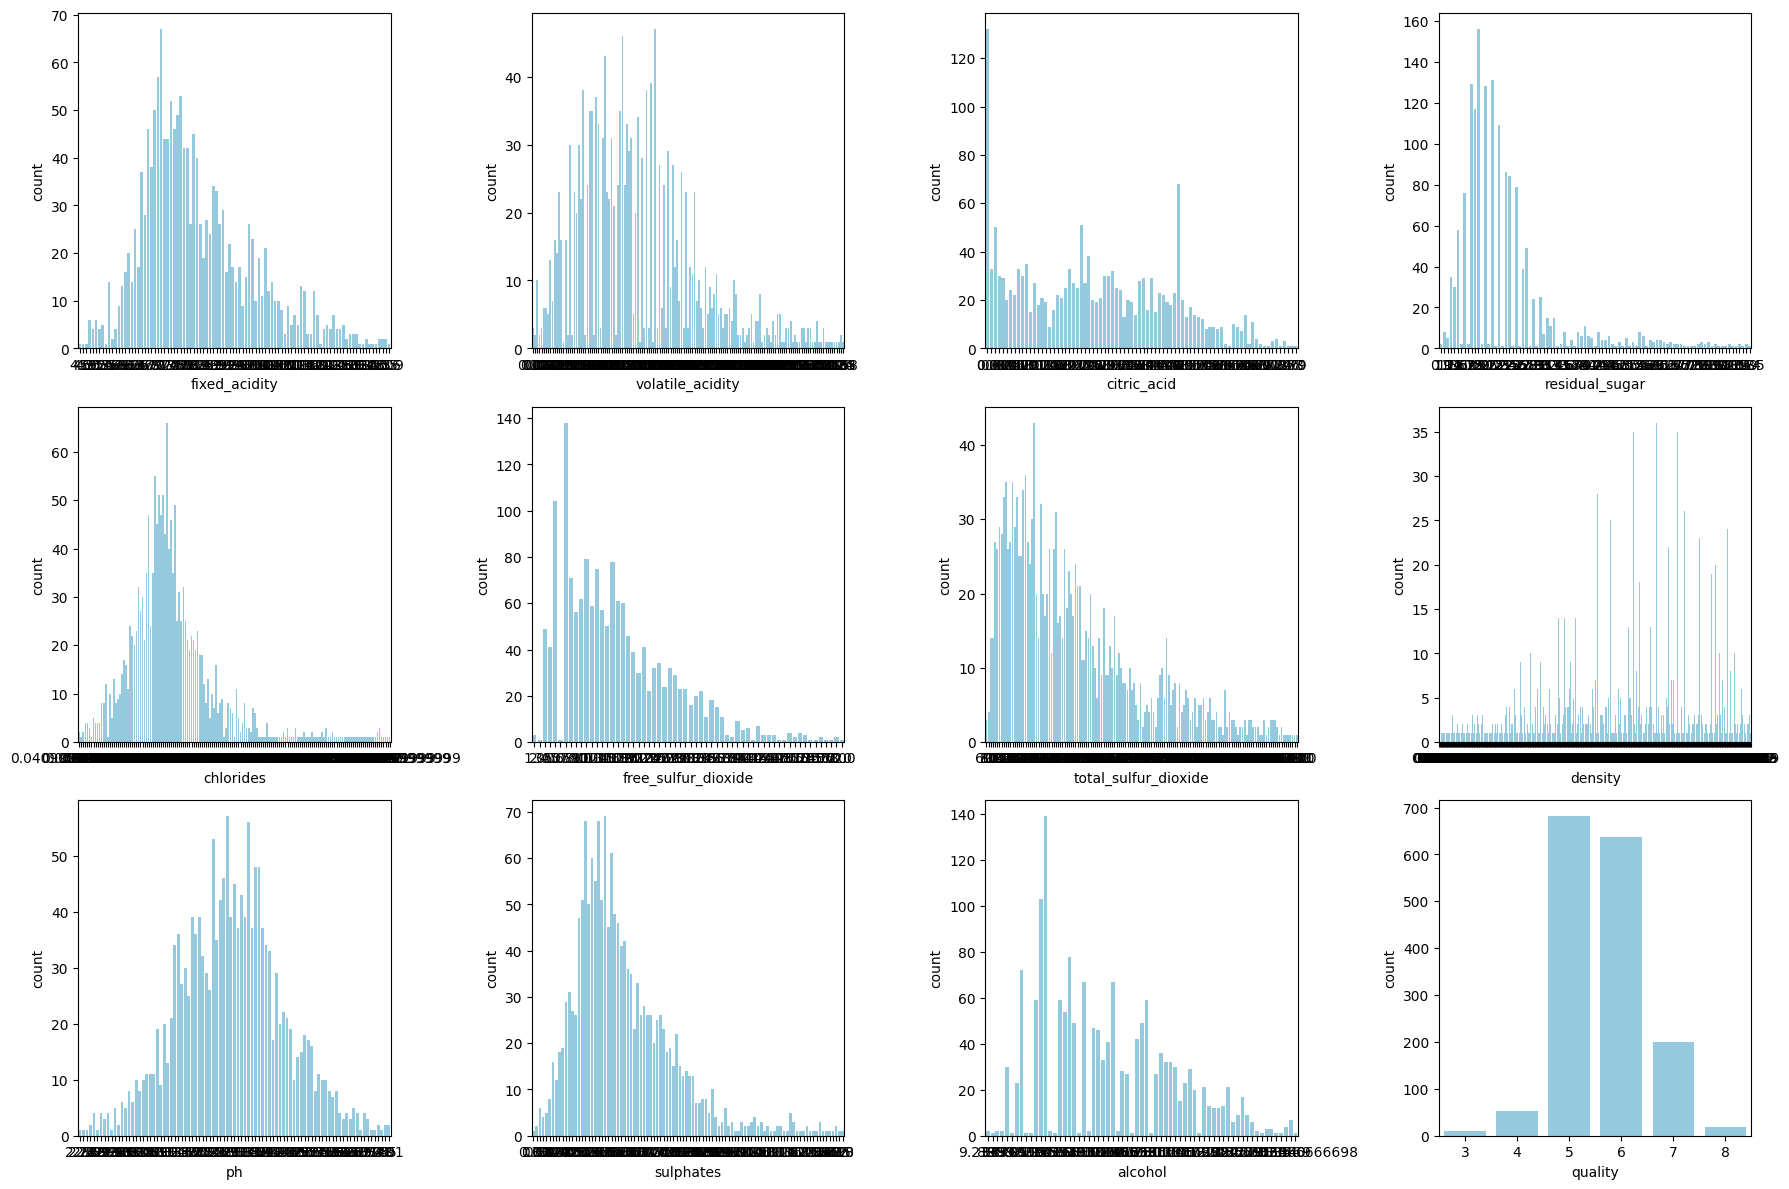

In [44]:
plt.figure(figsize=(18, 12))

for i, column in enumerate(columns):
    plt.subplot(3, 4, i + 1)
    sns.countplot(data=data, x=column, color='skyblue')

plt.tight_layout()
plt.show()

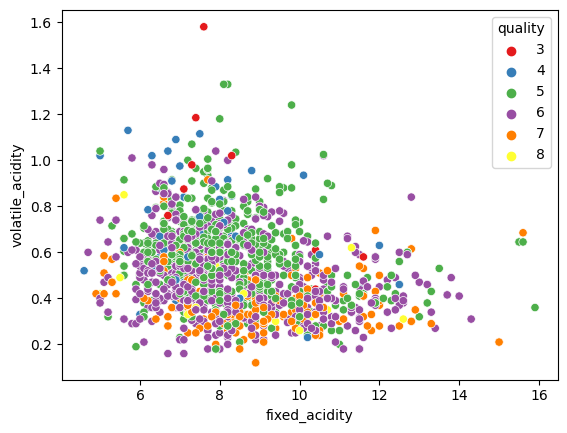

In [45]:
sns.scatterplot(data=data, x="fixed_acidity", y="volatile_acidity", hue="quality", palette="Set1")
plt.show()

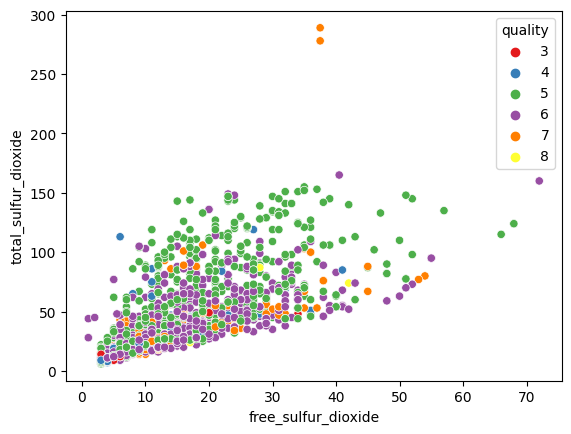

In [46]:
sns.scatterplot(data=data, x="free_sulfur_dioxide", y="total_sulfur_dioxide", hue="quality", palette="Set1")
plt.show()

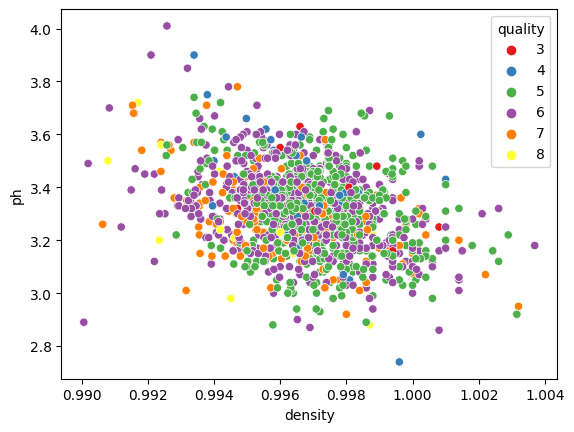

In [47]:
sns.scatterplot(data=data, x="density", y="ph", hue="quality", palette="Set1")
plt.show()

<a id="multivariate"></a>
**4.3. Multivariate**

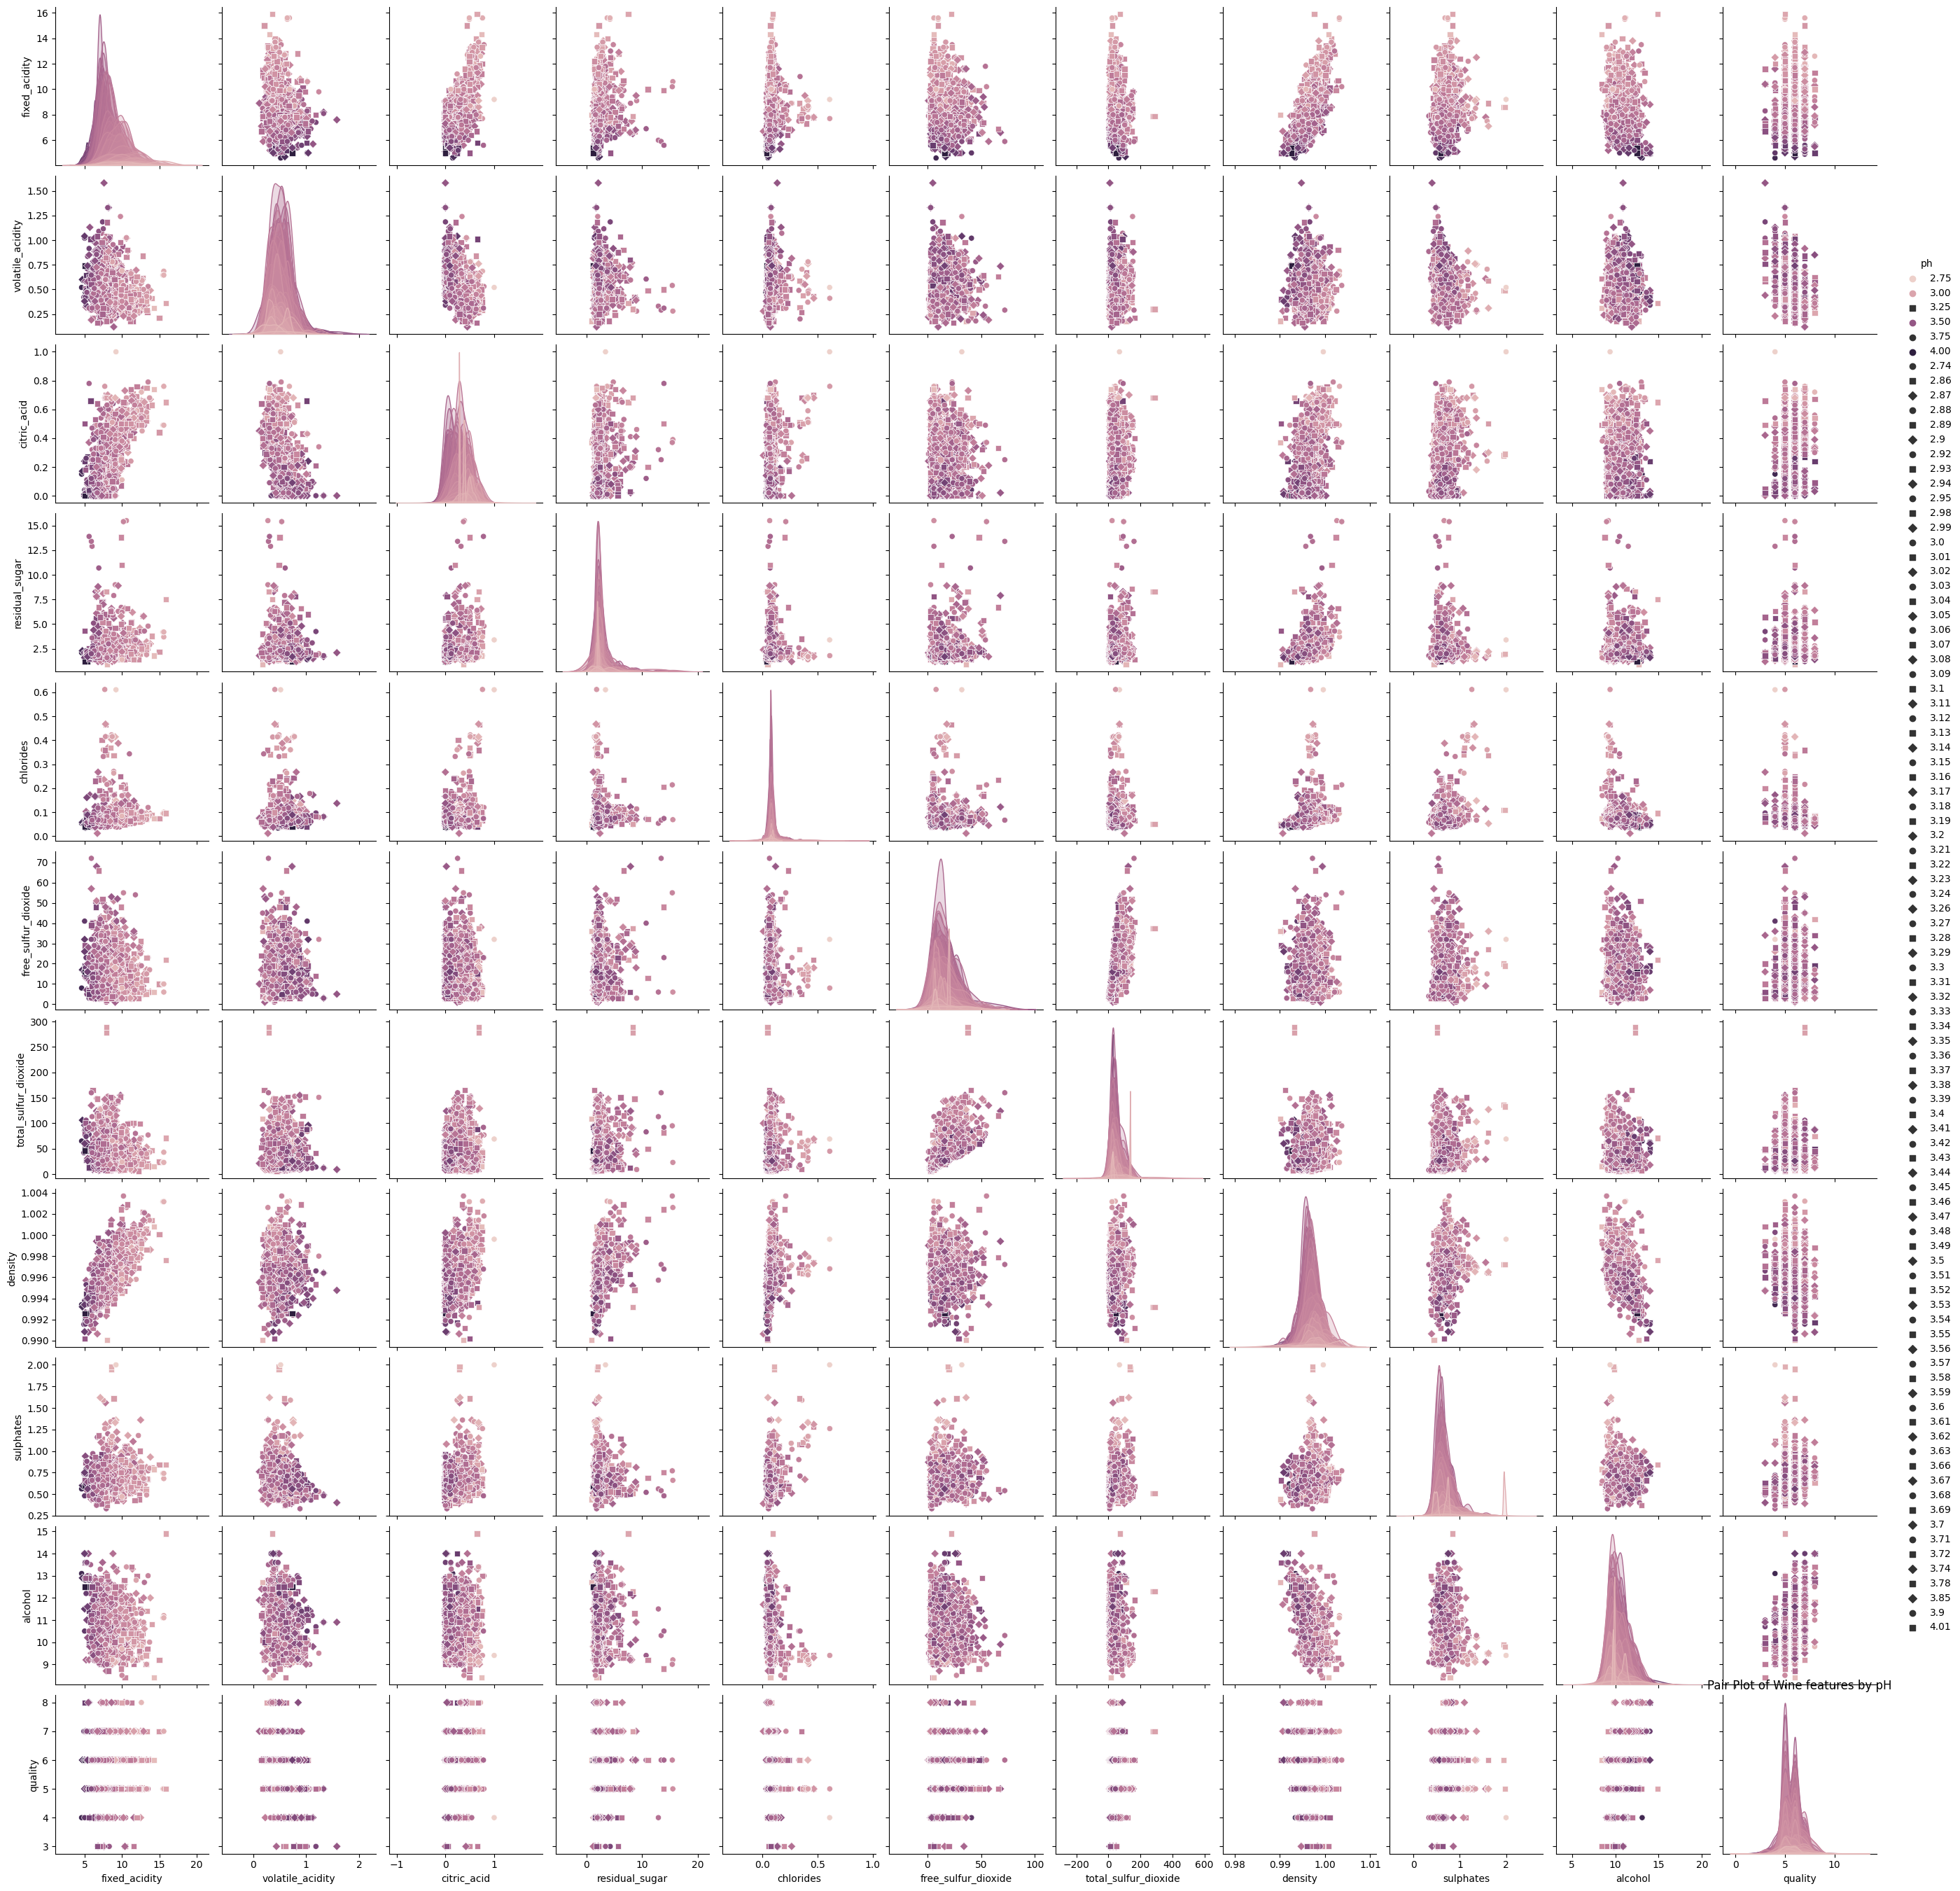

In [ ]:
sns.pairplot(data, hue='ph', markers=["o", "s", "D"], diag_kind='kde')
plt.title('Pair Plot of Wine features by pH')
plt.show()

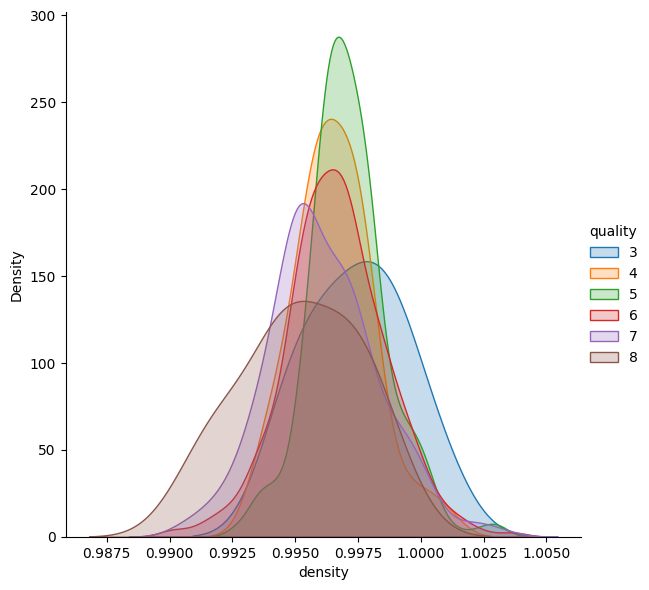

In [48]:
sns.FacetGrid(data, hue="quality", height=6).map(sns.kdeplot, "density", shade=True).add_legend()

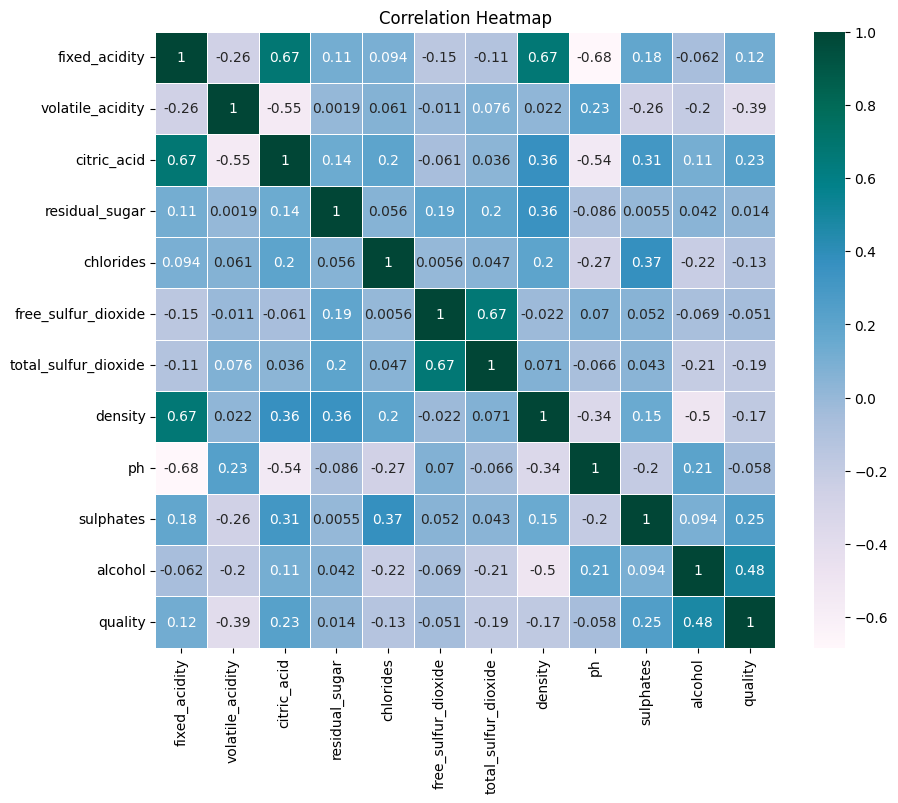

In [49]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PuBuGn', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

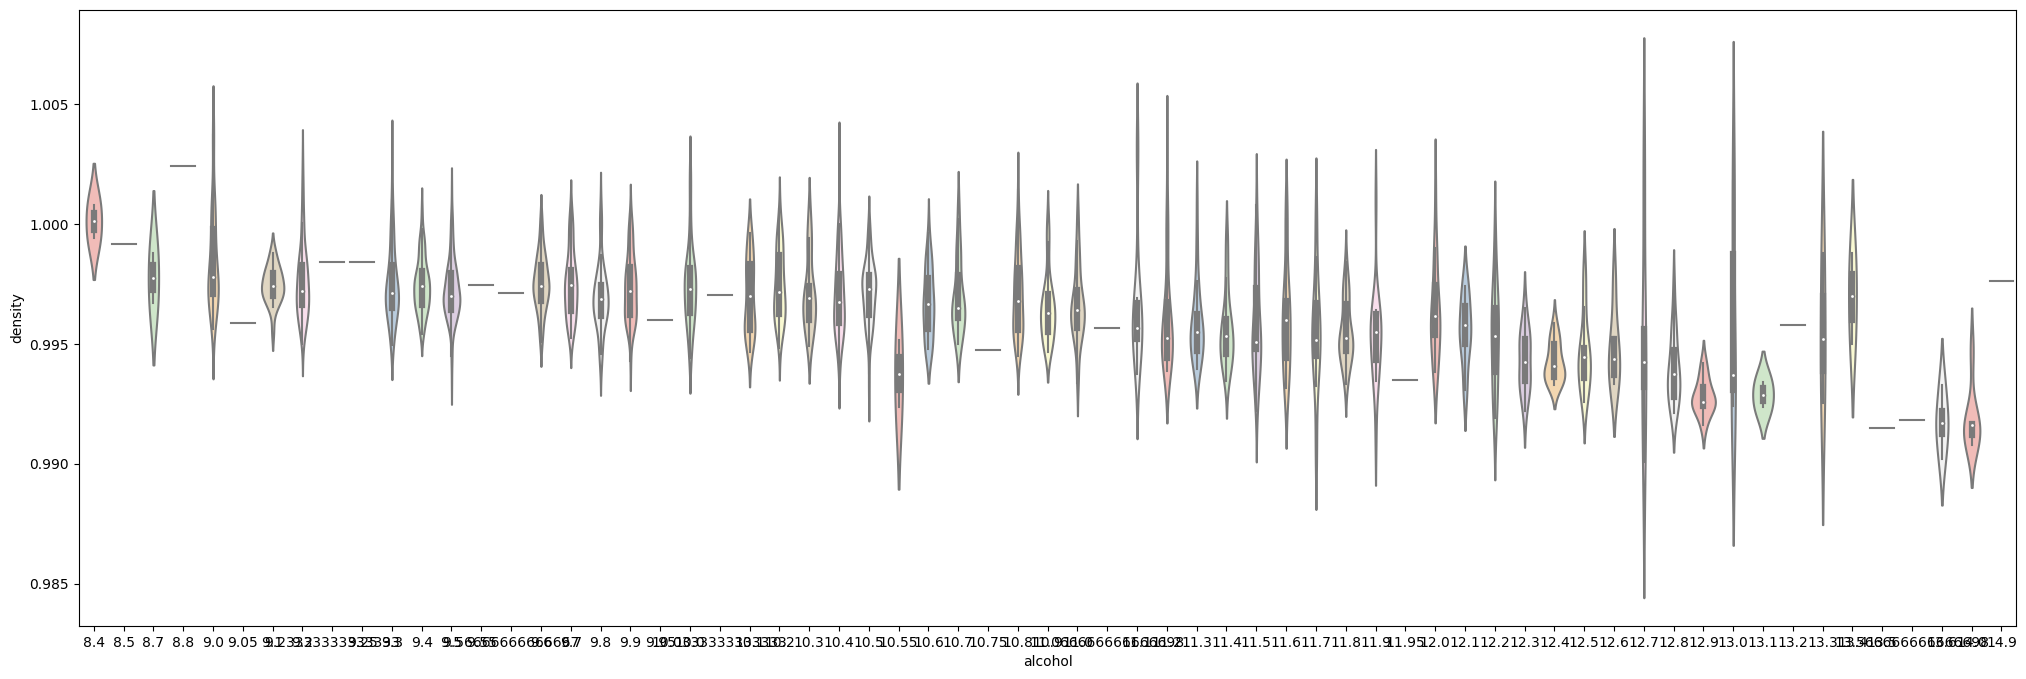

In [50]:
plt.figure(figsize=(25, 8))
sns.violinplot(data=data, x="alcohol", y="density", palette="Pastel1")
plt.show()

<a id="modeling"></a>
**5. Model building**

In [51]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [60]:
le = LabelEncoder()
data['quality'] = le.fit_transform(data['quality'])

In [61]:
X = data.drop('quality', axis=1)  # Independent variables
y = data['quality']  # Dependent variable

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [64]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

1279 1279
320 320


In [83]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(max_depth=4, splitter='best', criterion='entropy'),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=200)
}

In [95]:
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    mat = confusion_matrix(y_test, y_pred)

    results.append({
        'name': model_name,
        'r2': r2,
        'mse': mse,
        'mae': mae,
        'f1': f1,
        'precision': precision,
        'accuracy': accuracy,
    })
    print("Confusion matrix of ", model_name, ":\n", mat)
    print("Classification report of ", model_name, ":\n", report)
    print("Crosstab of ", model_name, ":\n", pd.crosstab(y_test, y_pred))


sorted_results = sorted(results, key=lambda x: x['accuracy'], reverse=True)

sorted_results = pd.DataFrame(sorted_results)

styled_results = sorted_results.style.background_gradient(cmap=sns.color_palette("cool", as_cmap=True))

styled_results

Confusion matrix of  Logistic Regression :
 [[268   5]
 [ 35  12]]
Classification report of  Logistic Regression :
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

Crosstab of  Logistic Regression :
 col_0      0   1
quality         
0        268   5
1         35  12
Confusion matrix of  Decision Tree Classifier :
 [[265   8]
 [ 34  13]]
Classification report of  Decision Tree Classifier :
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       273
           1       0.62      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.75      0.62      0.65       320
weighted avg       0.85      0.87      0.85       320



<a id="evaluate"></a>
**6. Model Evaluation and testing the model on random values**

In [100]:
random_state = 42

evaluation_results = []

X_random = data.sample(n=100, random_state=random_state).drop(columns=['quality'])
y_random = data.loc[X_random.index]['quality']

for model_name, model in models.items():
    y_pred_random = model.predict(X_random)

    accuracy_random = accuracy_score(y_random, y_pred_random)
    f1_random = f1_score(y_random, y_pred_random, average='weighted')
    precision_random = precision_score(y_random, y_pred_random, average='weighted')
    r2_random = r2_score(y_random, y_pred_random)
    mse_random = mean_squared_error(y_random, y_pred_random)
    mae_random = mean_absolute_error(y_random, y_pred_random)

    evaluation_results.append({
        'name': model_name,
        'r2': r2_random,
        'mse': mse_random,
        'mae': mae_random,
        'f1': f1_random,
        'precision': precision_random,
        'accuracy': accuracy_random,
    })

sorted_evaluation_results = sorted(evaluation_results, key=lambda x: x['accuracy'], reverse=True)

df_evaluation_results = pd.DataFrame(sorted_evaluation_results)

print(df_evaluation_results)

                       name        r2   mse   mae        f1  precision  \
0  Decision Tree Classifier -0.162791  0.14  0.14  0.795269    0.73960   
1  Random Forest Classifier -0.162791  0.14  0.14  0.795269    0.73960   
2       Logistic Regression -0.993355  0.24  0.24  0.776839    0.79825   

   accuracy  
0      0.86  
1      0.86  
2      0.76  


<a id="conclusion"></a>
**7. Conclusion**

In [106]:
conclusion = """
Based on the evaluation of models on random data samples, the model with the highest accuracy is Random Forest Classifier with an accuracy of {best_accuracy}. However, it's essential to note that these results may not fully represent the model's performance on the entire dataset. Further analysis and cross-validation are needed 
to make a more robust conclusion.
""".format(best_accuracy=100*df_evaluation_results['accuracy'].iloc[0])

print(conclusion)


Based on the evaluation of models on random data samples, the model with the highest accuracy is Random Forest Classifier with an accuracy of 86.0. However, it's essential to note that these results may not fully represent the model's performance on the entire dataset. Further analysis and cross-validation are needed 
to make a more robust conclusion.

